# Salary American People - Lista 6

## Importing libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from ml_libs import metrics
from importlib import reload
from sklearn import linear_model
#preprocessing
from ml_libs import resample
from ml_libs import transform

In [4]:
#this line serves to you dont have to reload every time you execute this code
reload(metrics)
reload(resample)
reload(transform);

## ---------------------------------------------------------------------------------------------------------------------------------

## Setting columns of dataframe

In [12]:
cols = ['AGE','WORKCLASS','FNLWGT','EDUCATION','EDUCATION_NUM','MERITAL_STATUS','OCCUPATION','RELATIONSHIP',
        'RACE','SEX','CAP_GAIN','CAP_LOST','HOURS_PER_WEEK','NATIVE_COUNTRY','LABEL']
df = pd.read_csv('adult.data', names=cols, na_values='?', sep=',\s+', engine='python')

In [11]:
df = df.drop(['EDUCATION'], axis=1)
# Indentificação das colunas com dados categóricos
cat_columns = df.select_dtypes(['object']).columns
#'Object' é sobre as colunas categóricas)

In [7]:
cat_columns

Index(['WORKCLASS', 'MERITAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE',
       'SEX', 'NATIVE_COUNTRY', 'LABEL'],
      dtype='object')

In [13]:
df[:30]

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [483]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [484]:
df.shape

(32561, 14)

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
AGE               32561 non-null int64
WORKCLASS         30725 non-null object
FNLWGT            32561 non-null int64
EDUCATION_NUM     32561 non-null int64
MERITAL_STATUS    32561 non-null object
OCCUPATION        30718 non-null object
RELATIONSHIP      32561 non-null object
RACE              32561 non-null object
SEX               32561 non-null object
CAP_GAIN          32561 non-null int64
CAP_LOST          32561 non-null int64
HOURS_PER_WEEK    32561 non-null int64
NATIVE_COUNTRY    31978 non-null object
LABEL             32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [486]:
# Setting precision for 4 decimal places
pd.set_option('precision',4)
df.describe()

,AGE,FNLWGT,EDUCATION_NUM,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK
count,32561.0000,3.2561e+04,32561.0000,32561.0000,32561.0000,32561.0000
mean,38.5816,1.8978e+05,10.0807,1077.6488,87.3038,40.4375
std,13.6404,1.0555e+05,2.5727,7385.2921,402.9602,12.3474
min,17.0000,1.2285e+04,1.0000,0.0000,0.0000,1.0000
25%,28.0000,1.1783e+05,9.0000,0.0000,0.0000,40.0000
50%,37.0000,1.7836e+05,10.0000,0.0000,0.0000,40.0000
75%,48.0000,2.3705e+05,12.0000,0.0000,0.0000,45.0000
max,90.0000,1.4847e+06,16.0000,99999.0000,4356.0000,99.0000


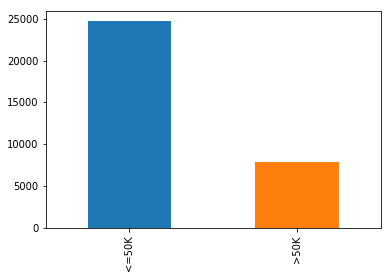

In [544]:
# Showing the difference and why this need be stratified
df['LABEL'].value_counts().plot(kind='bar')

In [488]:
df['LABEL'].value_counts()

<=50K    24720
>50K      7841
Name: LABEL, dtype: int64

In [489]:
df_final = resample.Utils.stratify(df)

In [490]:
# new dataframe balanced
df_final['LABEL'].value_counts()

<=50K    7841
>50K     7841
Name: LABEL, dtype: int64

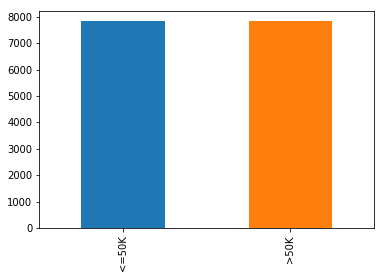

In [491]:
# showing length for two classes
df_final['LABEL'].value_counts().plot(kind='bar')

## ---------------------------------------------------------------------------------------------------------------------------------

## Preprocessing of data

### Transforming labels to numeric values

In [492]:
# df.isnull() é a mesma coisa da linha a baixo
df_final.isna()

,AGE,WORKCLASS,FNLWGT,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
429,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13240,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28283,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3346,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8692,False,True,False,False,False,True,False,False,False,False,False,False,False,False
7797,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17854,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18743,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9049,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29246,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [493]:
# pega a quantidade de valores nulos para cada coluna
df_final.isna().sum()

AGE                 0
WORKCLASS         720
FNLWGT              0
EDUCATION_NUM       0
MERITAL_STATUS      0
OCCUPATION        722
RELATIONSHIP        0
RACE                0
SEX                 0
CAP_GAIN            0
CAP_LOST            0
HOURS_PER_WEEK      0
NATIVE_COUNTRY    294
LABEL               0
dtype: int64

In [494]:
# setting mode value for missing values
for column in ['WORKCLASS', 'OCCUPATION', 'NATIVE_COUNTRY']:
    df_final[column] = df_final[column].replace(np.nan, df_final[column].mode()[0])

In [495]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15682 entries, 429 to 30807
Data columns (total 14 columns):
AGE               15682 non-null int64
WORKCLASS         15682 non-null object
FNLWGT            15682 non-null int64
EDUCATION_NUM     15682 non-null int64
MERITAL_STATUS    15682 non-null object
OCCUPATION        15682 non-null object
RELATIONSHIP      15682 non-null object
RACE              15682 non-null object
SEX               15682 non-null object
CAP_GAIN          15682 non-null int64
CAP_LOST          15682 non-null int64
HOURS_PER_WEEK    15682 non-null int64
NATIVE_COUNTRY    15682 non-null object
LABEL             15682 non-null object
dtypes: int64(6), object(8)
memory usage: 1.8+ MB


In [496]:
df_final = df_final.dropna(how='all') # elimina apenas quando todos os valores de uma linha são NaN
# Elimina colunas com 3 ou mais valores NaN
df_final = df_final.dropna(thresh=3)

In [497]:
df_final.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION_NUM', 'MERITAL_STATUS',
       'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX', 'CAP_GAIN', 'CAP_LOST',
       'HOURS_PER_WEEK', 'NATIVE_COUNTRY', 'LABEL'],
      dtype='object')

In [498]:
df_final

,AGE,WORKCLASS,FNLWGT,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
429,47,Local-gov,287480,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
13240,23,Private,520775,8,Never-married,Priv-house-serv,Own-child,White,Male,0,0,30,United-States,<=50K
28283,35,Private,110538,9,Divorced,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,<=50K
3346,27,Private,58654,11,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
8692,65,Private,149049,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
7797,43,Private,208613,13,Separated,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K
17854,36,Self-emp-not-inc,202950,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Iran,<=50K
18743,48,Private,128432,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
9049,55,Private,201112,9,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
29246,58,Private,142326,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [500]:
# Transforming categorics in one-hot encoding
df_final = pd.get_dummies(df_final, columns=cat_columns, prefix=cat_columns, drop_first=True)
df_final = df_final.rename(columns={'LABEL_>50K':'LABEL'})

In [501]:
df_final[7831:7861]

,AGE,FNLWGT,EDUCATION_NUM,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,...,NATIVE_COUNTRY_Puerto-Rico,NATIVE_COUNTRY_Scotland,NATIVE_COUNTRY_South,NATIVE_COUNTRY_Taiwan,NATIVE_COUNTRY_Thailand,NATIVE_COUNTRY_Trinadad&Tobago,NATIVE_COUNTRY_United-States,NATIVE_COUNTRY_Vietnam,NATIVE_COUNTRY_Yugoslavia,LABEL
5483,22,61850,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5558,38,114079,9,0,0,44,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
678,31,125457,9,0,0,45,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
13165,28,38309,11,2407,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30567,40,168071,12,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
24001,23,112819,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
23374,38,329980,13,0,0,55,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
13897,24,193920,14,0,0,45,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6681,34,115488,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
29043,23,315065,10,0,0,35,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [502]:
df_final['LABEL'].unique()

array([0, 1], dtype=uint64)

## ---------------------------------------------------------------------------------------------------------------------------------

## Correlation analisis

In [552]:
## Show correlation
df_final.corr().style.background_gradient(cmap='RdYlGn').set_precision(4)

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Setting dataset for trainning and test

In [504]:
dados = resample.Utils.split_stratified_train_test(df_final, 0.7, 42)
X_train = dados[0]
y_train = dados[1]
X_test = dados[2]
y_test = dados[3]

# defining train and test for X normalized
# X_train_norm = transform.Normalize.fit_transform(X_train)
# X_test_norm = transform.Normalize.fit_transform(X_test)


# defining train and test for X standardized
# X_train_std = transform.Standardize.fit_transform(X_train)
# X_test_std = transform.Standardize.fit_transform(X_test)

In [553]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10977, 14), (10977,), (4705, 14), (4705,))

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Calculating average for testing

In [506]:
np.average(X_train), np.average(y_train)

(13604.596305261652, 0.5894142297531202)

In [507]:
np.average(X_test), np.average(y_test)

(13812.758979808714, 0.6051009564293305)

## Normalize data

In [509]:
(X_train - X_train.min())/ (X_train.max() - X_train.min())

array([[4.15789229e-05, 2.04070984e-02, 8.15272998e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.03818250e-05, 1.28020688e-01, 1.05985490e-05, ...,
        8.15272998e-07, 0.00000000e+00, 0.00000000e+00],
       [3.01651009e-05, 2.33763227e-01, 8.15272998e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.69040089e-05, 2.18378210e-01, 8.15272998e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.63054600e-05, 1.82815187e-01, 6.52218399e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01651009e-05, 2.16078325e-01, 1.22290950e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [510]:
X_train_norm = transform.Normalize.fit_transform(X_train)
X_test_norm = transform.Normalize.fit_transform(X_test)

X_train_std = transform.Standardize.fit_transform(X_train)
X_test_std = transform.Standardize.fit_transform(X_test)

C:\Users\Jonas Lopes\Documents\GitHub\Machine-Learning-7-Semestr\Lista 6 - Renda Americanos\ml_libs\transform.py:8: RuntimeWarning: invalid value encountered in true_divide
  X_norm[:, i] = (X[:, i] - np.min(X[:, i])) / (np.max(X[:, i]) - np.min(X[:, i]))
C:\Users\Jonas Lopes\Documents\GitHub\Machine-Learning-7-Semestr\Lista 6 - Renda Americanos\ml_libs\transform.py:16: RuntimeWarning: invalid value encountered in true_divide
  X_std[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])


### Used classifiers:

- Linear Regression - Scikit
- Stochastic Gradient Descent Regressor (SGDRegressor) do Scikit-Learn

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Test

In [518]:
'''Setting model variables'''
model_Perceptron = Perceptron()
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier()

'''Setting model variables normalized'''
model_Perceptron_norm = Perceptron()
model_KNN_norm = KNeighborsClassifier()
model_DT_norm = DecisionTreeClassifier()

'''Setting model variables standardized'''
model_Perceptron_std = Perceptron()
model_KNN_std = KNeighborsClassifier()
model_DT_std = DecisionTreeClassifier()

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Trainning models

In [520]:
'''Trainning models normaly'''
model_Perceptron.fit(X_train, y_train)
model_KNN.fit(X_train, y_train)
model_DT.fit(X_train, y_train)

'''Trainning models with normatization'''
model_Perceptron_norm.fit(X_train_norm, y_train)
model_KNN_norm.fit(X_train_norm, y_train)
model_DT_norm.fit(X_train_norm, y_train)

'''Trainning models with standardization'''
model_Perceptron_std.fit(X_train_std, y_train)
model_KNN_std.fit(X_train_std, y_train)
model_DT_std.fit(X_train_std, y_train)

C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

## Make predictions

In [531]:
'''Make predictions with X_test normaly'''
pred_Perceptron = model_Perceptron.predict(X_test)
pred_KNN = model_KNN.predict(X_test)
pred_DT = model_DT.predict(X_test)

'''Make predictions with X_test normatized'''
pred_Perceptron_norm = model_Perceptron_norm.predict(X_test_norm)
pred_KNN_norm = model_KNN_norm.predict(X_test_norm)
pred_DT_norm = model_DT_norm.predict(X_test_norm)

'''Make predictions with X_test standardized'''
pred_Perceptron_std = model_Perceptron_std.predict(X_test_std)
pred_KNN_std = model_KNN_std.predict(X_test_std)
pred_DT_std = model_DT_std.predict(X_test_std)

## ---------------------------------------------------------------------------------------------------------------------------------


# Results

### Perceptron

In [554]:
print(metrics.accuracy(y_test, pred_Perceptron))

0.4573857598299681


In [555]:
print(metrics.accuracy(y_test, pred_Perceptron_norm))

0.44250797024442085


In [556]:
print(metrics.accuracy(y_test, pred_Perceptron_std))

0.5290116896918172


### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### KNN

In [557]:
print(metrics.accuracy(y_test, pred_KNN))

0.5825717321997874


In [558]:
print(metrics.accuracy(y_test, pred_KNN_norm))

0.6051009564293305


In [559]:
print(metrics.accuracy(y_test, pred_KNN_std))

0.3948990435706695


### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Decision Tree

In [562]:
print(metrics.accuracy(y_test, pred_DT))

0.6599362380446334


In [561]:
print(metrics.accuracy(y_test, pred_DT_norm))

0.6072263549415515


In [560]:
print(metrics.accuracy(y_test, pred_DT_std))

0.7047821466524974
